# K-Means Clustering
>  This chapter introduces a different clustering algorithm - k-means clustering - and its implementation in SciPy. K-means clustering overcomes the biggest drawback of hierarchical clustering that was discussed in the last chapter. As dendrograms are specific to hierarchical clustering, this chapter discusses one method to find the number of clusters before running k-means clustering. The chapter concludes with a discussion on the limitations of k-means clustering and discusses considerations while using this algorithm.

- toc: true 
- badges: true
- comments: true
- author: Lucas Nunes
- categories: [Datacamp]
- image: images/datacamp/___

> Note: This is a summary of the course's chapter 3 exercises "Cluster Analysis in Python" at datacamp. <br>[Github repo](https://github.com/lnunesAI/Datacamp/) / [Course link](https://www.datacamp.com/tracks/machine-learning-scientist-with-python)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (8, 8)

## Basics of k-means clustering

### K-means clustering: first exercise

<div class=""><p>This exercise will familiarize you with the usage of k-means clustering on a dataset. Let us use the Comic Con dataset and check how k-means clustering works on it.</p>
<p>Recall the two steps of k-means clustering:</p>
<ul>
<li>Define cluster centers through <code>kmeans()</code> function. It has two required arguments: observations and number of clusters.</li>
<li>Assign cluster labels through the <code>vq()</code> function. It has two required arguments: observations and cluster centers.</li>
</ul>
<p>The data is stored in a Pandas data frame, <code>comic_con</code>. <code>x_scaled</code> and <code>y_scaled</code> are the column names of the standardized X and Y coordinates of people at a given point in time.</p></div>

In [4]:
comic_con = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/06-cluster-analysis-in-python/datasets/comic_con_36x4.csv')

Instructions
<ul>
<li>Import <code>kmeans</code> and <code>vq</code> functions in SciPy.</li>
<li>Generate cluster centers using the <code>kmeans()</code> function with two clusters.</li>
<li>Create cluster labels using these cluster centers.</li>
</ul>

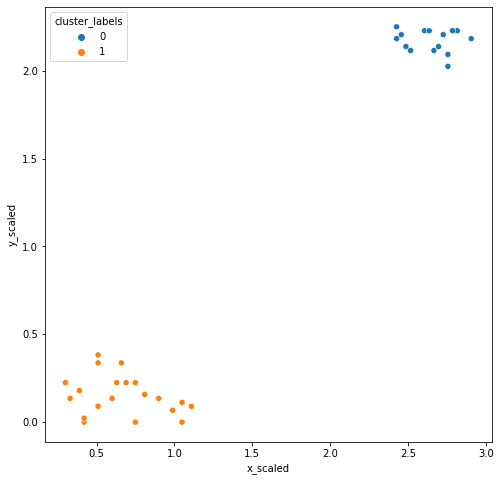

In [6]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)

# Assign cluster labels
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

**Notice that the clusters formed are exactly the same as hierarchical clustering that you did in the previous chapter.**

### Runtime of k-means clustering

<div class=""><p>Recall that it took a significantly long time to run hierarchical clustering. How long does it take to run the <code>kmeans()</code> function on the FIFA dataset?</p>
<p>The data is stored in a Pandas data frame, <code>fifa</code>. <code>scaled_sliding_tackle</code> and <code>scaled_aggression</code> are the relevant scaled columns. <code>timeit</code> and <code>kmeans</code> have been imported.</p>
<p>Cluster centers are defined through the <code>kmeans()</code> function. It has two required arguments: observations and number of clusters. You can use <code>%timeit</code> before a piece of code to check how long it takes to run. You can time the <code>kmeans()</code> function for three clusters on the <code>fifa</code> dataset.</p></div>

<pre>
Possible Answers

~ 50 μs (microseconds)

<b>~ 50 ms (milliseconds)</b>

~ 50 s (seconds)
</pre>

**It took only about 5 seconds to run hierarchical clustering on this data, but only 50 milliseconds to run k-means clustering.**

## How many clusters?

### Elbow method on distinct clusters

<div class=""><p>Let us use the comic con data set to see how the elbow plot looks on a data set with distinct, well-defined clusters. You may want to display the data points before proceeding with the exercise.</p>
<p>The data is stored in a Pandas data frame, <code>comic_con</code>. <code>x_scaled</code> and <code>y_scaled</code> are the column names of the standardized X and Y coordinates of people at a given point in time.</p></div>

Instructions 1/2
<ul>
<li>Create a list of distortions for each cluster in <code>num_clusters</code>.</li>
<li>Create a data frame <code>elbow_plot</code> with <code>num_clusters</code> and <code>distortions</code>.</li>
<li>With the <code>.lineplot()</code> method, plot <code>elbow_plot</code> with <code>num_clusters</code> in the x axis and <code>distortions</code> in the y axis.</li>
</ul>

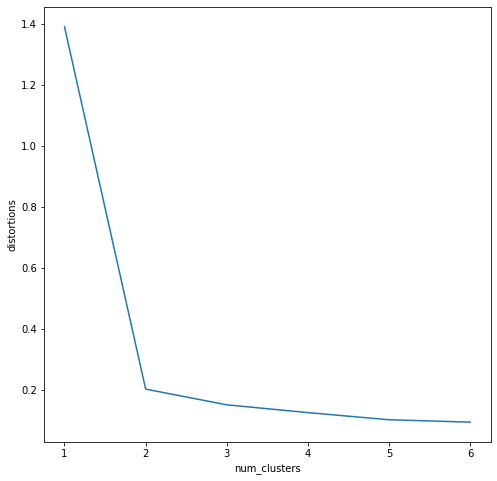

In [7]:
distortions = []
num_clusters = range(1, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - num_clusters, distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

Instructions 2/2
<p>Question

From the elbow plot, how many clusters are there in the data?</p>
<pre>
Possible Answers

<b>2 clusters</b>

4 clusters

6 clusters
</pre>

### Elbow method on uniform data

<div class=""><p>In the earlier exercise, you constructed an elbow plot on data with well-defined clusters. Let us now see how the elbow plot looks on a data set with uniformly distributed points. You may want to display the data points on the console before proceeding with the exercise.</p>
<p>The data is stored in a Pandas data frame, <code>uniform_data</code>. <code>x_scaled</code> and <code>y_scaled</code> are the column names of the standardized X and Y coordinates of points.</p></div>

In [9]:
uniform_data = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/06-cluster-analysis-in-python/datasets/uniform_data.csv')

Instructions 1/2
<ul>
<li>Create a list of distortions for each cluster in <code>num_clusters</code>.</li>
<li>Create a data frame <code>elbow_plot</code> with <code>num_clusters</code> and <code>distortions</code>.</li>
<li>With the <code>.lineplot()</code> method, plot <code>elbow_plot</code> with <code>num_clusters</code> in the x axis and <code>distortions</code> in the y axis.</li>
</ul>

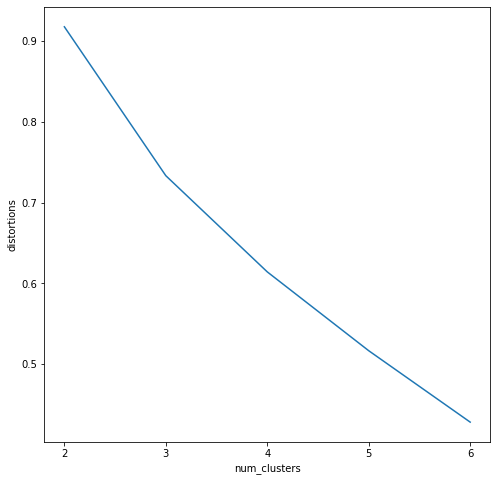

In [10]:
distortions = []
num_clusters = range(2, 7)

# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion =  kmeans(uniform_data[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

# Create a data frame with two lists - number of clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

# Creat a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.show()

Instructions 2/2
<p>Question

From the elbow plot, how many clusters are there in the data?</p>
<pre>
Possible Answers

<b>Can not be determined</b>

3 clusters

4 clusters
</pre>

**There is no well defined elbow in this plot!**

### Limitations of k-means clustering

### Impact of seeds on distinct clusters

<div class=""><p>You noticed the impact of seeds on a dataset that did not have well-defined groups of clusters. In this exercise, you will explore whether seeds impact the clusters in the Comic Con data, where the clusters are well-defined.</p>
<p>The data is stored in a Pandas data frame, <code>comic_con</code>. <code>x_scaled</code> and <code>y_scaled</code> are the column names of the standardized X and Y coordinates of people at a given point in time.</p></div>

Instructions 1/2
<p>Import the <code>random</code> class from <code>numpy</code> and initialize the seed with the integer <code>0</code>.</p>

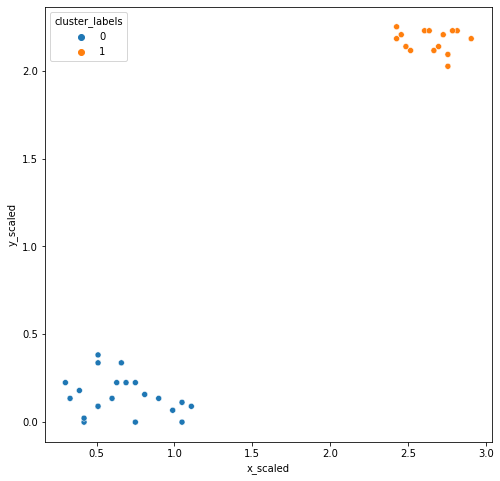

In [11]:
# Import random class
from numpy import random

# Initialize seed
random.seed(0)

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

Instructions 2/2
<p>Change your code from the earlier step so that the seed is initialized with a list <code>[1, 2, 1000]</code>.</p>

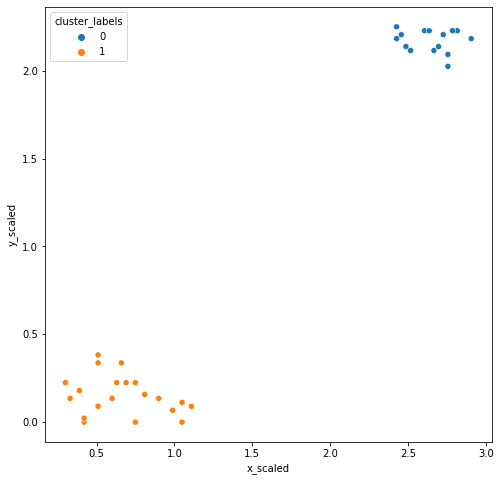

In [12]:
# Initialize seed
random.seed([1, 2, 1000])

# Run kmeans clustering
cluster_centers, distortion = kmeans(comic_con[['x_scaled', 'y_scaled']], 2)
comic_con['cluster_labels'], distortion_list = vq(comic_con[['x_scaled', 'y_scaled']], cluster_centers)

# Plot the scatterplot
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

**Notice that the plots have not changed after changing the seed as the clusters are well-defined.**

### Uniform clustering patterns

<div class=""><p>Now that you are familiar with the impact of seeds, let us look at the bias in k-means clustering towards the formation of uniform clusters.</p>
<p>Let us use a mouse-like dataset for our next exercise. A mouse-like dataset is a group of points that resemble the head of a mouse: it has three clusters of points arranged in circles, one each for the face and two ears of a mouse.</p>
<p>Here is how a typical mouse-like dataset looks like (<a href="https://www.researchgate.net/figure/Clustering-results-for-the-Mouse-data-set-where-the-black-boxes-represent-the-centroids_fig3_256378655" target="_blank" rel="noopener noreferrer">Source</a>).</p>
<p><img src="https://assets.datacamp.com/production/repositories/3842/datasets/fa03a65258018a0c945528a987cdd250010de1ee/Clustering-results-for-the-Mouse-data-set-where-the-black-boxes-represent-the-centroids.ppm" alt=""></p>
<p>The data is stored in a Pandas data frame, <code>mouse</code>. <code>x_scaled</code> and <code>y_scaled</code> are the column names of the standardized X and Y coordinates of the data points.</p></div>

In [14]:
mouse = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/06-cluster-analysis-in-python/datasets/mouse.csv')

Instructions
<ul>
<li>Import <code>kmeans</code> and <code>vq</code> functions in SciPy.</li>
<li>Generate cluster centers using the <code>kmeans()</code> function with three clusters.</li>
<li>Create cluster labels with <code>vq()</code> with the cluster centers generated above.</li>
</ul>

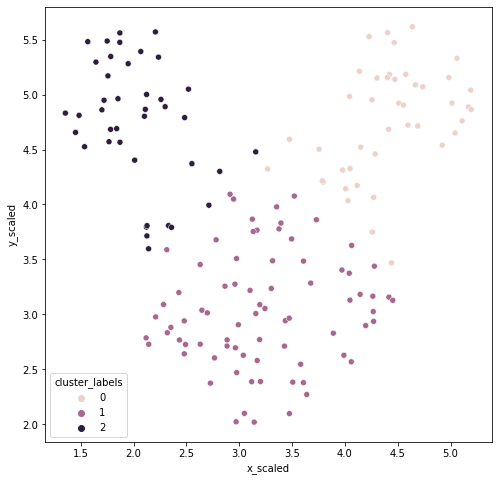

In [15]:
# Import the kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Generate cluster centers
cluster_centers, distortion = kmeans(mouse[['x_scaled', 'y_scaled']], 3)

# Assign cluster labels
mouse['cluster_labels'], distortion_list = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers)

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = mouse)
plt.show()

**Notice that kmeans is unable to capture the three visible clusters clearly, and the two clusters towards the top have taken in some points along the boundary. This happens due to the underlying assumption in kmeans algorithm to minimize distortions which leads to clusters that are similar in terms of area.**

### FIFA 18: defenders revisited

<div class=""><p>In the FIFA 18 dataset, various attributes of players are present. Two such attributes are:</p>
<ul>
<li><em>defending</em>: a number which signifies the defending attributes of a player</li>
<li><em>physical</em>: a number which signifies the physical attributes of a player</li>
</ul>
<p>These are typically defense-minded players. In this exercise, you will perform clustering based on these attributes in the data.</p>
<p>The following modules have been pre-loaded: <code>kmeans</code>, <code>vq</code> from <code>scipy.cluster.vq</code>, <code>matplotlib.pyplot</code> as <code>plt</code>, <code>seaborn</code> as <code>sns</code>. The data for this exercise is stored in a Pandas dataframe, <code>fifa</code>. The scaled variables are <code>scaled_def</code> and <code>scaled_phy</code>.</p></div>

In [18]:
fifa = pd.read_csv('https://raw.githubusercontent.com/lnunesAI/Datacamp/main/2-machine-learning-scientist-with-python/06-cluster-analysis-in-python/datasets/fifa_250x187.csv')

Instructions 1/4
<li>Initialize the random seed to the list <code>[1000,2000]</code>.</li>

In [16]:
# Set up a random seed in numpy
random.seed([1000,2000])

Instructions 2/4
<li>Fit the scaled data in columns <code>scaled_def</code> and <code>scaled_phy</code> into a k-means clustering algorithm with 3 clusters and assign cluster labels.</li>

In [19]:
# Fit the data into a k-means algorithm
cluster_centers,_ = kmeans(fifa[['scaled_def', 'scaled_phy']], 3)

# Assign cluster labels
fifa['cluster_labels'],_ = vq(fifa[['scaled_def', 'scaled_phy']], cluster_centers)

Instructions 3/4
<li>Display cluster centers of each cluster with respect to the scaled columns by calculating the mean value for each cluster.</li>

In [20]:
# Display cluster centers 
print(fifa[['scaled_def', 'scaled_phy', 'cluster_labels']].groupby('cluster_labels').mean())

                scaled_def  scaled_phy
cluster_labels                        
0                 3.743692    8.867419
1                 1.865936    7.082691
2                 2.096297    8.944870


Instructions 4/4
<li>Create a <code>seaborn</code> scatter plot with <code>scaled_def</code> on the x-axis and <code>scaled_phy</code> on the y-axis, with each cluster represented by a different color.</li>

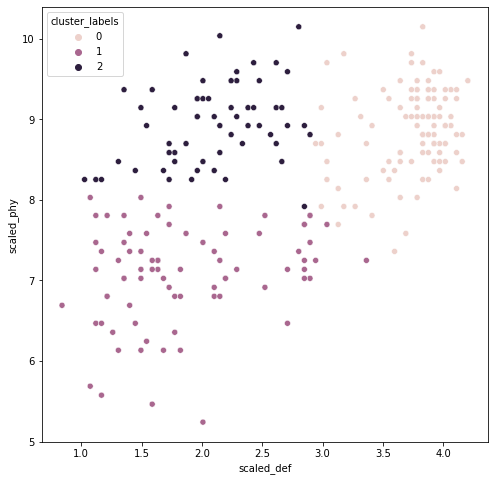

In [21]:
# Create a scatter plot through seaborn
sns.scatterplot(x='scaled_def', y='scaled_phy', hue='cluster_labels', data=fifa)
plt.show()

**Notice that the seed has an impact on clustering as the data is uniformly distributed.**